<br><p style="font-family: Arial; font-size:3.75em;font-style:bold">
BUAN 6340 Group Project <br> <br> <br> 
# How Personalities And Drug Consumption Are Related

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
sns.set_style("whitegrid")

In [81]:
df = pd.read_csv('file:///Users/meihao/Desktop/programming%20for%20data%20science/drug_consumption.csv')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


#### Age gender education country ethnicity these categorical columns in real world are transformed into numeric by case fraction  

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [83]:
print("Number of Unique Countries: ", len(df.Country.unique()))
print("Number of Unique Ethnicity: ", len(df.Ethnicity.unique()))
print("Number of Unique Age: ", len(df.Age.unique()))
print("Number of Unique Education: ", len(df.Education.unique()))

Number of Unique Countries:  7
Number of Unique Ethnicity:  7
Number of Unique Age:  6
Number of Unique Education:  9


# Data Processing

In [84]:
df['Gender'] = df['Gender'].astype(str)
df=df.apply(pd.Series.replace, to_replace='0.48246000000000006',value='Female')
df=df.apply(pd.Series.replace, to_replace='-0.48246000000000006',value='Male')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,Female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,Male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,Male,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,Female,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,Female,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [85]:
df['Ethnicity'] = df['Ethnicity'].astype(str)
df=df.apply(pd.Series.replace, to_replace='0.126',value='White/Asian')
df=df.apply(pd.Series.replace, to_replace='-0.31685',value='White')
df=df.apply(pd.Series.replace, to_replace='0.1144',value='Other')
df=df.apply(pd.Series.replace, to_replace='-0.22166',value='White/Black')
df=df.apply(pd.Series.replace, to_replace='-0.50212',value='Asian')
df=df.apply(pd.Series.replace, to_replace='-1.1070200000000001',value='Black')
df=df.apply(pd.Series.replace, to_replace='1.90725',value='Black/Asian')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,Female,-0.05921,0.96082,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,Male,1.98437,0.96082,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,Male,-0.05921,0.96082,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,Female,1.16365,0.96082,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,Female,1.98437,0.96082,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [86]:
df['Age'] = df['Age'].astype(str)
df=df.apply(pd.Series.replace, to_replace='0.49788000000000004',value='35-44')
df=df.apply(pd.Series.replace, to_replace='-0.07854',value='25-34')
df=df.apply(pd.Series.replace, to_replace='-0.9519700000000001',value='18-24')
df=df.apply(pd.Series.replace, to_replace='2.59171',value='65+')
df=df.apply(pd.Series.replace, to_replace='1.09449',value='45-54')
df=df.apply(pd.Series.replace, to_replace='1.82213',value='55-64')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,-0.05921,0.96082,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,1.98437,0.96082,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,-0.05921,0.96082,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,0.96082,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,1.98437,0.96082,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [87]:
df['Country'] = df['Country'].astype(str)
df=df.apply(pd.Series.replace, to_replace='0.9608200000000001',value='UK')
df=df.apply(pd.Series.replace, to_replace='-0.09765',value='Australia')
df=df.apply(pd.Series.replace, to_replace='0.24923',value='Canada')
df=df.apply(pd.Series.replace, to_replace='-0.46841000000000005',value='New Zealand')
df=df.apply(pd.Series.replace, to_replace='-0.28519',value='Other')
df=df.apply(pd.Series.replace, to_replace='0.21128000000000002',value='Republic of Ireland')
df=df.apply(pd.Series.replace, to_replace='-0.57009',value='USA')
df.head(20)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,-0.05921,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,1.98437,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,-0.05921,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,1.98437,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,65+,Female,-1.22751,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,45-54,Male,1.16365,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,35-44,Male,-1.73790,UK,White,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,35-44,Female,-0.05921,Canada,White,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,55-64,Male,1.16365,UK,White,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [88]:
df['Education'] = df['Education'].astype(str)
df=df.apply(pd.Series.replace, to_replace='-2.43591',value='before 16 years')
df=df.apply(pd.Series.replace, to_replace='-1.7379',value='at 16 years')
df=df.apply(pd.Series.replace, to_replace='-1.43719',value='at 17 years')
df=df.apply(pd.Series.replace, to_replace='-1.22751',value='at 18 years')
df=df.apply(pd.Series.replace, to_replace='-0.6111300000000001',value='Some College,No Certificate Or Degree')
df=df.apply(pd.Series.replace, to_replace='-0.059210000000000006',value='Professional Certificate/ Diploma')
df=df.apply(pd.Series.replace, to_replace='0.45468000000000003',value='University Degree')
df=df.apply(pd.Series.replace, to_replace='1.16365',value='Masters Degree')
df=df.apply(pd.Series.replace, to_replace='1.98437',value='Doctorate Degree')
df.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional Certificate/ Diploma,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,65+,Female,at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,45-54,Male,Masters Degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,35-44,Male,at 16 years,UK,White,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,35-44,Female,Professional Certificate/ Diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,55-64,Male,Masters Degree,UK,White,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


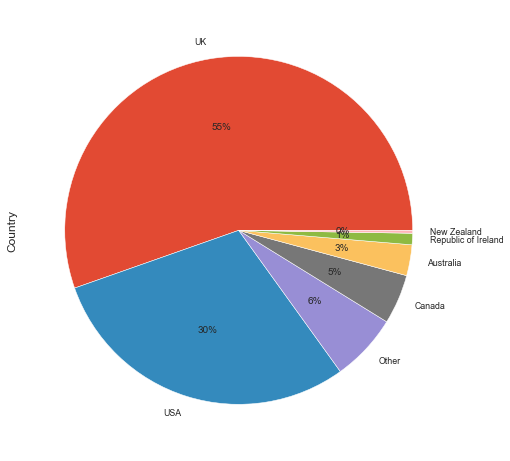

In [60]:
labels = ['UK', 'USA', 'Other', 'Canada', 'Australia', 'Republic of Ireland', 'New Zealand']
countries = df['Country'].value_counts().plot(kind='pie', labels=labels, figsize=(8, 8),autopct='%1.0f%%')

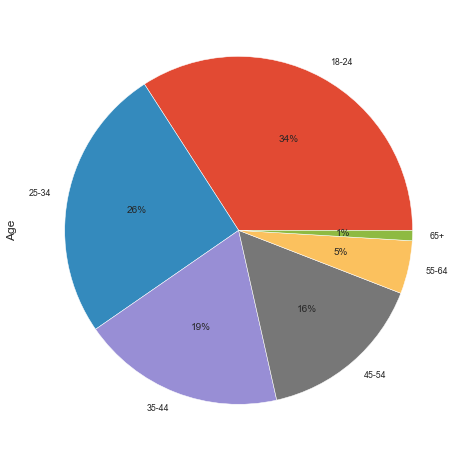

In [61]:
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
countries = df['Age'].value_counts().plot(kind='pie', labels=labels, figsize=(8, 8),autopct='%1.0f%%')

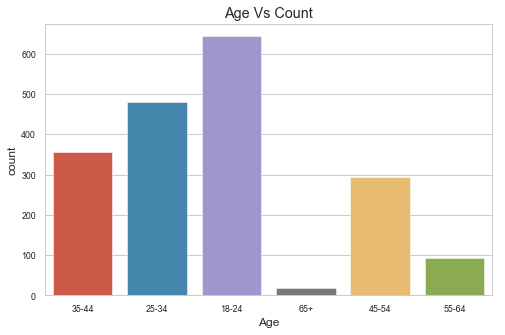

In [62]:
ax = sns.countplot(x='Age', data=df)
plt.title('Age Vs Count')
ax.figure.set_size_inches(8, 5)

In [63]:
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']



In [45]:

from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
copy_df = df.copy()  
for column in columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])
    
# split the data into 2 parts, user & non-user
for i in range(len(columns)):
    copy_df.loc[((copy_df[columns[i]]==0) | (copy_df[columns[i]]==1)),cp[i]] = 'Non-user'
    copy_df.loc[((copy_df[columns[i]]==2) | (copy_df[columns[i]]==3) | (copy_df[columns[i]]==4) | (copy_df[columns[i]]==5) | (copy_df[columns[i]]==6)),cp[i]] = 'User'
    
for i in range(len(columns)):
    s = copy_df.groupby([cp[i]])[columns[i]].count()
    
print(s)    

User_VSA
Non-user    1655
User         230
Name: VSA, dtype: int64


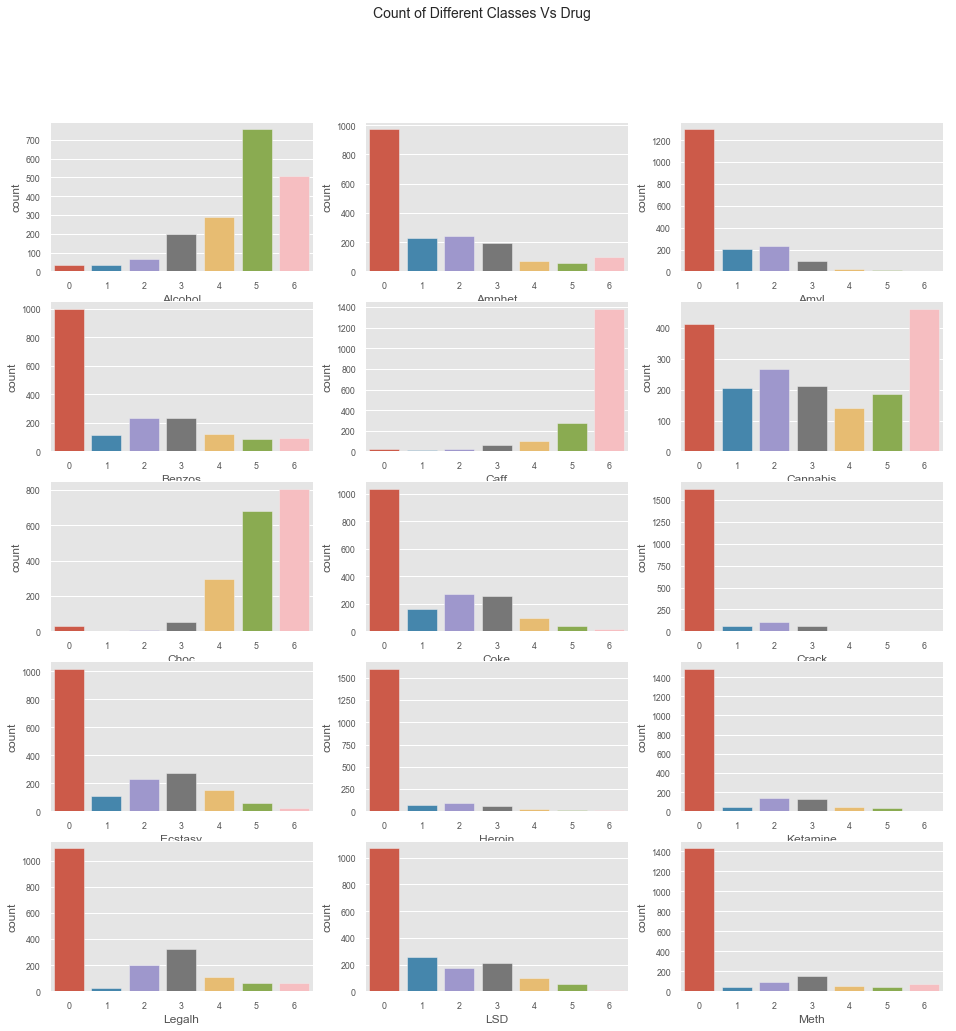

In [46]:
fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=columns[k], data=copy_df,ax=axes[i][j])
        k+=1

plt.show()

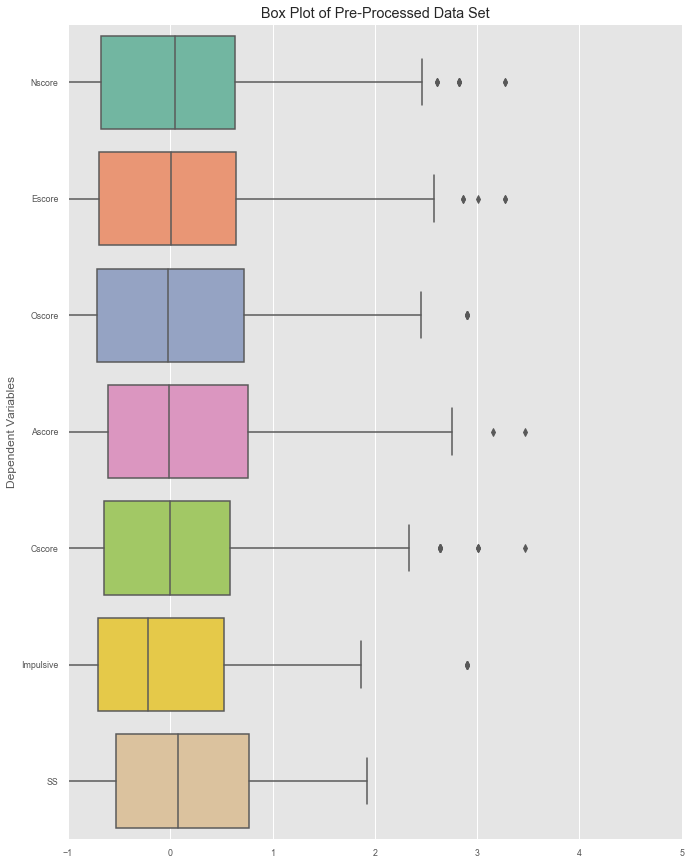

In [64]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 15))

ax.set(xlim=(-1, 5))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = df[feature_col_names], 
  orient = 'h', 
  palette = 'Set2')

In [65]:
count_of_users = []
count_of_non_users = []

for i in range(len(columns)):
    s = copy_df.groupby([cp[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])
    
trace1 = go.Bar(
    x=columns,
    y=count_of_users,
    name='User',
    marker = dict(color="rgb(117, 127, 221)")
)
trace2 = go.Bar(
    x=columns,
    y=count_of_non_users,
    name='Non-User',
    marker = dict(color="rgb(191, 221, 229)")
)


data = [trace1, trace2]
layout = go.Layout(
    title= 'Drug Vs User Or Non-user',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [66]:
for column in copy_df.columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])
    
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
copy_df['Count'] = pd.Series()
copy_df['Count'] = copy_df['Count'].fillna(value = 0.0)

for i in cp:
    copy_df['Count']+=copy_df[i]

pk = copy_df['Count'].value_counts()

col = [i for i in range(len(pk.values))]
data = [
go.Bar(
    x = list(pk.index),
    y = list(pk.values),
    marker=dict(color=col, colorscale='Jet', showscale=False)
),]
layout= go.Layout(
    title= 'Used Drugs Vs Number of Users',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    xaxis=dict(title='Drug Count', ticklen=5, gridwidth=2),
)
fig= go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Drug-Count')

In [67]:
df['Country'].value_counts()
con = ['UK','USA','Canada','Australia','Ireland','New Zealand']

data = [dict(
        type='choropleth',
        locations = con,
        locationmode='country names',
        z=(df['Country'].value_counts().values),
        text=con,
        colorscale='portland',
        reversescale=True,
)]
layout = dict(
    title = 'A Map About Population of Drug Addicted in Each Country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world-map')

/Users/meihao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



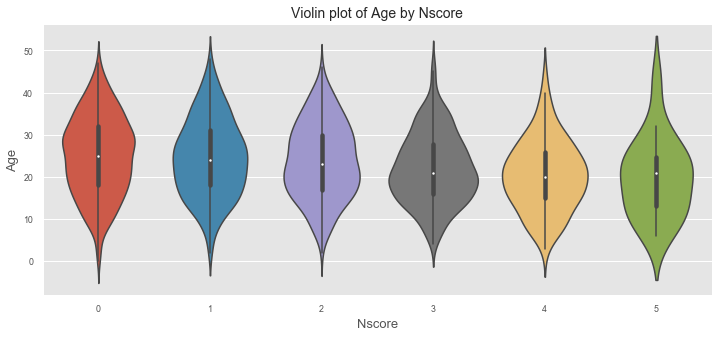

In [68]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Nscore', data=df)
plt.title('Violin plot of Age by Nscore',fontsize=14)
plt.xlabel('Nscore',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

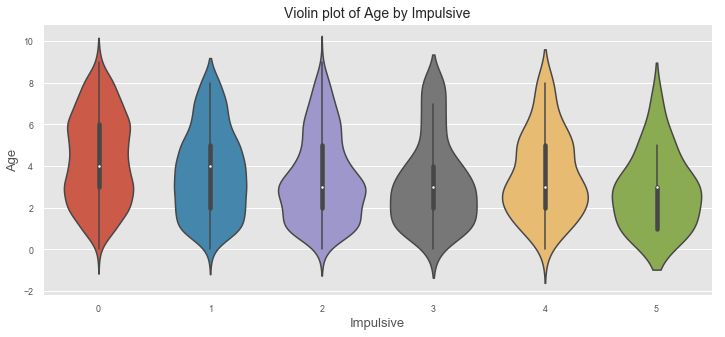

In [69]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Impulsive', data=df)
plt.title('Violin plot of Age by Impulsive',fontsize=14)
plt.xlabel('Impulsive',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

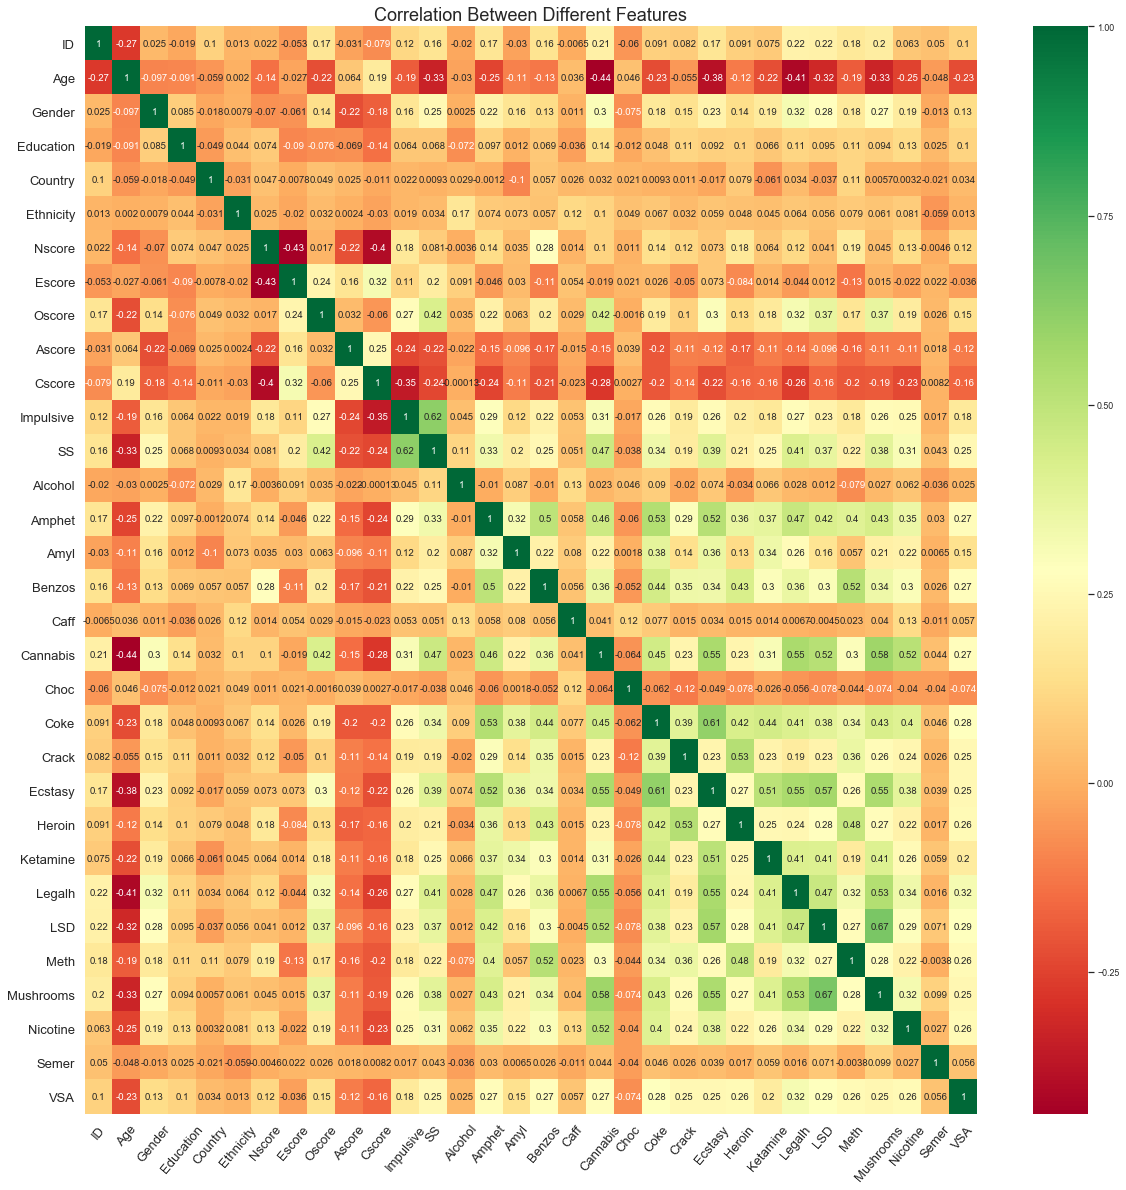

In [70]:
corrmat = df.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=0.8)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df.columns, xticklabels = df.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation Between Different Features",fontsize=18)
plt.show()

#### Now, we've done for the first part of data processing and we get rid off the numeric mask for categorical in original dataset, including age, gender, education, country, ethnicity column

#### Next we are moving on the data processing to transform the categorical data into hot vector(no ordinal difference) and 0,1...(ordinal difference)

In [89]:
## age 
age = df['Age']
ageVal = df['Age'].unique()
ageValCount = len(ageVal)
age_dict = {}
for i in range(0,ageValCount):
    age_dict[ageVal[i]] = i
df['Age'] = df['Age'].map(age_dict).astype(int)

In [90]:
## Gender
g_to_no = {
    'Female':0,
    'Male':1
}
df['Gender'] = df['Gender'].map(g_to_no).astype(int)

In [91]:
### education 
df['Education'].unique()
e_to_no = {
   'before 16 years' : 0,
    'Professional Certificate/ Diploma': 1,
    'Some College,No Certificate Or Degree': 2,
    'at 16 years':3,
    'University Degree':4,
    'at 17 years':5,
    'at 18 years':6,
    'Masters Degree':7,
    'Doctorate Degree':8  
}
df['Education'] = df['Education'].map(e_to_no).astype(int)

In [92]:
### country get dummies
df['Country'].unique()

country_du = pd.get_dummies(df['Country'],prefix = 'Country')
df = pd.concat([df,country_du], axis = 1).drop('Country', axis = 1)

In [94]:
### Ethnicity
df['Ethnicity'].unique()

eth_du = pd.get_dummies(df['Ethnicity'],prefix = 'Ethnicity')
df = pd.concat([df,eth_du], axis = 1).drop('Ethnicity', axis = 1)

In [95]:
df.head()

,ID,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Black/Asian,Ethnicity_Other,Ethnicity_White,Ethnicity_White/Asian,Ethnicity_White/Black
0,1,0,0,1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,0,1,0,0,0,0,0,0,1,0
1,2,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,0,1,0,0,0,0,0,1,0,0
2,3,0,1,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,0,1,0,0,0,0,0,1,0,0
3,4,2,0,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0,1,0,0,0,0,0,1,0,0
4,5,0,0,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,0,1,0,0,0,0,0,1,0,0


# Chose 3 drugs

In [32]:
Alcohol = []
for i in df['Alcohol']:
    if(i==0):
        Alcohol.append([1,0,0,0,0,0,0])
    elif(i==1):
        Alcohol.append([0,1,0,0,0,0,0])
    elif(i==2):
        Alcohol.append([0,0,1,0,0,0,0])
    elif(i==3):
        Alcohol.append([0,0,0,1,0,0,0])
    elif(i==4):
        Alcohol.append([0,0,0,0,1,0,0])
    elif(i==5):
        Alcohol.append([0,0,0,0,0,1,0])
    elif(i==6):
        Alcohol.append([0,0,0,0,0,0,1])
Al = np.array(Alcohol)

In [33]:
Caff = []
for i in df['Caff']:
    if(i==0):
        Caff.append([1,0,0,0,0,0,0])
    elif(i==1):
        Caff.append([0,1,0,0,0,0,0])
    elif(i==2):
        Caff.append([0,0,1,0,0,0,0])
    elif(i==3):
        Caff.append([0,0,0,1,0,0,0])
    elif(i==4):
        Caff.append([0,0,0,0,1,0,0])
    elif(i==5):
        Caff.append([0,0,0,0,0,1,0])
    elif(i==6):
        Caff.append([0,0,0,0,0,0,1])
Ca = np.array(Caff)

In [34]:
Cannabis = []
for i in df['Cannabis']:
    if(i==0):
        Cannabis.append([1,0,0,0,0,0,0])
    elif(i==1):
        Cannabis.append([0,1,0,0,0,0,0])
    elif(i==2):
        Cannabis.append([0,0,1,0,0,0,0])
    elif(i==3):
        Cannabis.append([0,0,0,1,0,0,0])
    elif(i==4):
        Cannabis.append([0,0,0,0,1,0,0])
    elif(i==5):
        Cannabis.append([0,0,0,0,0,1,0])
    elif(i==6):
        Cannabis.append([0,0,0,0,0,0,1])
Can = np.array(Cannabis)

# Split Data for the 3 drugs

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_col_names = ['Age', 'Gender', 'Education', 'Country_Republic of Ireland', 
                     'Country_UK','Country_USA','Country_Canada','Country_Other',
                     'Country_New Zealand','Country_Australia','Ethnicity_Asian',
                     'Ethnicity_Black','Ethnicity_Black/Asian','Ethnicity_Other',
                     'Ethnicity_White','Ethnicity_White/Asian','Ethnicity_White/Black',
                     'Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

scal= MinMaxScaler()

X = df[feature_col_names].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Al, test_size=0.30, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Ca, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Can, test_size=0.30, random_state=42)

X_train1_New = scal.fit_transform(X_train1)

X_train2_New = scal.fit_transform(X_train2)

X_train3_New = scal.fit_transform(X_train3)


# Decision Tree

In [29]:
# for Cannabis
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=5,random_state=42)
tree2 = DecisionTreeClassifier(max_depth=5,random_state=42)
tree3 = DecisionTreeClassifier(max_depth=5,random_state=42)

tree3.fit(X_train3_New, y_train3)

print("Accuracy on training set for cannabis: {:.3f}".format(tree3.score(X_train3_New, y_train3)))
print("Accuracy on test set for cannabis: {:.3f}".format(tree3.score(X_test3, y_test3)))

Accuracy on training set for cannabis: 0.830
Accuracy on test set for cannabis: 0.717


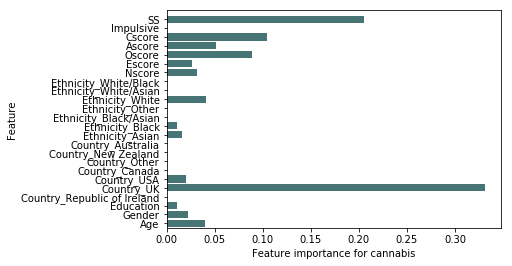

In [30]:
def plot_feature_importances_cannabis(model):
    n_features = X_train3.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, color=(0.2,0.4,0.4,0.9), align='center')
    #plt.barh(make a horizontal bar plot)
    plt.yticks(np.arange(n_features), feature_col_names)
    #plt.yticks(get the current trick location&label of the Y axis)
    plt.xlabel("Feature importance for cannabis")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features)

plot_feature_importances_cannabis(tree3)

In [31]:
#for Caff
tree2.fit(X_train2_New, y_train2)
print("Accuracy on training set for caff: {:.3f}".format(tree2.score(X_train2_New, y_train2)))
print("Accuracy on test set for caff: {:.3f}".format(tree2.score(X_test2, y_test2)))


Accuracy on training set for caff: 0.991
Accuracy on test set for caff: 0.670


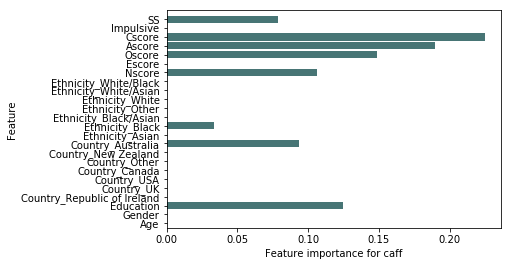

In [32]:
def plot_feature_importances_caff(model):
    n_features = X_train2.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, color=(0.2,0.4,0.4,0.9), align='center')
    #plt.barh(make a horizontal bar plot)
    plt.yticks(np.arange(n_features), feature_col_names)
    #plt.yticks(get the current trick location&label of the Y axis)
    plt.xlabel("Feature importance for caff")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features)

plot_feature_importances_caff(tree2)

In [36]:
#for alcohol
tree1.fit(X_train1_New, y_train1)
print("Accuracy on training set for Alcohol: {:.3f}".format(tree1.score(X_train1_New, y_train1)))
print("Accuracy on test set for Alcohol: {:.3f}".format(tree1.score(X_test1, y_test1)))



Accuracy on training set for Alcohol: 0.990
Accuracy on test set for Alcohol: 0.829


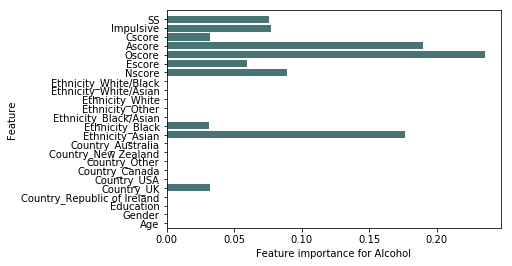

In [35]:
def plot_feature_importances_alcohol(model):
    n_features = X_train1.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, color=(0.2,0.4,0.4,0.9), align='center')
    #plt.barh(make a horizontal bar plot)
    plt.yticks(np.arange(n_features), feature_col_names)
    #plt.yticks(get the current trick location&label of the Y axis)
    plt.xlabel("Feature importance for Alcohol")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features)

plot_feature_importances_alcohol(tree1)

# grid searched tree

In [39]:
#grid searched tree
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 42)
param_DT = {"max_depth": range(1,15),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5),
           "criterion":('entropy','gini')}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train1_New,y_train1)
grid_tree.fit(X_train2_New,y_train2)
grid_tree.fit(X_train3_New,y_train3)
print(grid_tree.best_params_)
print()
print("Accuracy on train set for alcohol: {:.3f}".format(grid_tree.score(X_train1_New,y_train1)))
print("Accuracy on test set for alcohol: {:.3f}".format(grid_tree.score(X_test1,y_test1)))

print("Accuracy on train set for caffeine: {:.3f}".format(grid_tree.score(X_train2_New,y_train2)))
print("Accuracy on test set for caffeine: {:.3f}".format(grid_tree.score(X_test2,y_test2)))

print("Accuracy on train set for cannabis: {:.3f}".format(grid_tree.score(X_train3_New,y_train3)))
print("Accuracy on test set for cannabis: {:.3f}".format(grid_tree.score(X_test3,y_test3)))

{'criterion': 'entropy', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}

Accuracy on train set for alcohol: 0.983
Accuracy on test set for alcohol: 0.981
Accuracy on train set for caffeine: 0.985
Accuracy on test set for caffeine: 0.988
Accuracy on train set for cannabis: 0.780
Accuracy on test set for cannabis: 0.783


# We can perform each model on these 3 variables but for conciseness we focus on variable alcohol for all the following models

# Random Forest (use the same parameters from grid decision tree)

In [44]:
# random forest(use the same parameters from grid decision tree)
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=1, max_leaf_nodes=4, min_samples_split=2, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train1_New, y_train1)
rnd_clf.fit(X_train2_New, y_train2)
rnd_clf.fit(X_train3_New, y_train3)

y_pred1 = rnd_clf.predict(X_test1)
y_pred2 = rnd_clf.predict(X_test2)
y_pred3 = rnd_clf.predict(X_test3)

print("alcohol:{:.5f}".format(accuracy_score(y_test1, y_pred1)))
print("caffeine:{:.5f}".format(accuracy_score(y_test2, y_pred2)))
print("cannabis:{:.5f}".format(accuracy_score(y_test3, y_pred3)))


alcohol:0.98057
caffeine:0.98763
cannabis:0.78269


# Neural Network

In [61]:
# Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer

classifier = Sequential()
# Adding the input layer and the first hidden layer
# rectified linear unit
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=24))
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.1))

# Adding the output layer
classifier.add(Dense(output_dim=7, init='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.fit(X_train1_New, y_train1, validation_split = 0.20, batch_size=100, epochs=70,verbose=1)

/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=24, units=16, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  del sys.path[0]
/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  app.launch_new_instance()
/Users/meihao/anaconda3/lib/python3.7/site-pack

Train on 1055 samples, validate on 264 samples
Epoch 1/70
1055/1055 [==============================] - 0s 303us/step - loss: 0.6905 - accuracy: 0.9416 - val_loss: 0.6867 - val_accuracy: 0.9946
Epoch 2/70
1055/1055 [==============================] - 0s 31us/step - loss: 0.6829 - accuracy: 0.9951 - val_loss: 0.6770 - val_accuracy: 0.9946
Epoch 3/70
1055/1055 [==============================] - 0s 30us/step - loss: 0.6697 - accuracy: 0.9951 - val_loss: 0.6571 - val_accuracy: 0.9946
Epoch 4/70
1055/1055 [==============================] - 0s 31us/step - loss: 0.6395 - accuracy: 0.9951 - val_loss: 0.6087 - val_accuracy: 0.9946
Epoch 5/70
1055/1055 [==============================] - 0s 28us/step - loss: 0.5678 - accuracy: 0.9951 - val_loss: 0.5013 - val_accuracy: 0.9946
Epoch 6/70
1055/1055 [==============================] - 0s 31us/step - loss: 0.4277 - accuracy: 0.9951 - val_loss: 0.3201 - val_accuracy: 0.9946
Epoch 7/70
1055/1055 [==============================] - 0s 29us/step - loss: 0.236

Epoch 57/70
1055/1055 [==============================] - 0s 27us/step - loss: 0.0211 - accuracy: 0.9951 - val_loss: 0.0287 - val_accuracy: 0.9946
Epoch 58/70
1055/1055 [==============================] - 0s 26us/step - loss: 0.0218 - accuracy: 0.9951 - val_loss: 0.0287 - val_accuracy: 0.9946
Epoch 59/70
1055/1055 [==============================] - 0s 23us/step - loss: 0.0210 - accuracy: 0.9951 - val_loss: 0.0287 - val_accuracy: 0.9946
Epoch 60/70
1055/1055 [==============================] - 0s 22us/step - loss: 0.0220 - accuracy: 0.9951 - val_loss: 0.0289 - val_accuracy: 0.9946
Epoch 61/70
1055/1055 [==============================] - 0s 22us/step - loss: 0.0218 - accuracy: 0.9951 - val_loss: 0.0288 - val_accuracy: 0.9946
Epoch 62/70
1055/1055 [==============================] - 0s 24us/step - loss: 0.0216 - accuracy: 0.9951 - val_loss: 0.0288 - val_accuracy: 0.9946
Epoch 63/70
1055/1055 [==============================] - 0s 29us/step - loss: 0.0222 - accuracy: 0.9951 - val_loss: 0.0290 -

In [70]:
X_train1_New.shape

(1319, 24)

In [71]:
y_train1.shape

(1319, 7)

In [47]:
classifier.fit(X_train2_New, y_train1, validation_split = 0.20, batch_size=100, epochs=70,verbose=1)

Train on 1055 samples, validate on 264 samples
Epoch 1/70
1055/1055 [==============================] - 0s 65us/step - loss: 0.0215 - accuracy: 0.9951 - val_loss: 0.0294 - val_accuracy: 0.9946
Epoch 2/70
1055/1055 [==============================] - 0s 45us/step - loss: 0.0209 - accuracy: 0.9951 - val_loss: 0.0293 - val_accuracy: 0.9946
Epoch 3/70
1055/1055 [==============================] - 0s 31us/step - loss: 0.0210 - accuracy: 0.9951 - val_loss: 0.0296 - val_accuracy: 0.9946
Epoch 4/70
1055/1055 [==============================] - 0s 42us/step - loss: 0.0206 - accuracy: 0.9951 - val_loss: 0.0294 - val_accuracy: 0.9946
Epoch 5/70
1055/1055 [==============================] - 0s 31us/step - loss: 0.0215 - accuracy: 0.9951 - val_loss: 0.0294 - val_accuracy: 0.9946
Epoch 6/70
1055/1055 [==============================] - 0s 42us/step - loss: 0.0210 - accuracy: 0.9951 - val_loss: 0.0293 - val_accuracy: 0.9946
Epoch 7/70
1055/1055 [==============================] - 0s 31us/step - loss: 0.0215

Epoch 57/70
1055/1055 [==============================] - 0s 97us/step - loss: 0.0189 - accuracy: 0.9951 - val_loss: 0.0309 - val_accuracy: 0.9946
Epoch 58/70
1055/1055 [==============================] - 0s 79us/step - loss: 0.0188 - accuracy: 0.9951 - val_loss: 0.0310 - val_accuracy: 0.9946
Epoch 59/70
1055/1055 [==============================] - 0s 26us/step - loss: 0.0181 - accuracy: 0.9951 - val_loss: 0.0313 - val_accuracy: 0.9946
Epoch 60/70
1055/1055 [==============================] - 0s 26us/step - loss: 0.0187 - accuracy: 0.9951 - val_loss: 0.0315 - val_accuracy: 0.9946
Epoch 61/70
1055/1055 [==============================] - 0s 28us/step - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.0316 - val_accuracy: 0.9946
Epoch 62/70
1055/1055 [==============================] - 0s 27us/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.0312 - val_accuracy: 0.9946
Epoch 63/70
1055/1055 [==============================] - 0s 25us/step - loss: 0.0190 - accuracy: 0.9951 - val_loss: 0.0313 -

In [74]:
classifier.fit(X_train3_New, y_train3, validation_split = 0.20, batch_size=100, epochs=70,verbose=1)

Train on 1055 samples, validate on 264 samples
Epoch 1/70
1055/1055 [==============================] - 0s 38us/step - loss: 0.2127 - accuracy: 0.9377 - val_loss: 0.1577 - val_accuracy: 0.9351
Epoch 2/70
1055/1055 [==============================] - 0s 42us/step - loss: 0.1476 - accuracy: 0.9377 - val_loss: 0.1537 - val_accuracy: 0.9351
Epoch 3/70
1055/1055 [==============================] - 0s 29us/step - loss: 0.1516 - accuracy: 0.9377 - val_loss: 0.1480 - val_accuracy: 0.9351
Epoch 4/70
1055/1055 [==============================] - 0s 34us/step - loss: 0.1451 - accuracy: 0.9377 - val_loss: 0.1474 - val_accuracy: 0.9351
Epoch 5/70
1055/1055 [==============================] - 0s 30us/step - loss: 0.1435 - accuracy: 0.9377 - val_loss: 0.1466 - val_accuracy: 0.9351
Epoch 6/70
1055/1055 [==============================] - 0s 30us/step - loss: 0.1432 - accuracy: 0.9377 - val_loss: 0.1449 - val_accuracy: 0.9351
Epoch 7/70
1055/1055 [==============================] - 0s 31us/step - loss: 0.1426

Epoch 57/70
1055/1055 [==============================] - 0s 31us/step - loss: 0.1223 - accuracy: 0.9377 - val_loss: 0.1222 - val_accuracy: 0.9351
Epoch 58/70
1055/1055 [==============================] - 0s 25us/step - loss: 0.1212 - accuracy: 0.9377 - val_loss: 0.1221 - val_accuracy: 0.9351
Epoch 59/70
1055/1055 [==============================] - 0s 24us/step - loss: 0.1216 - accuracy: 0.9377 - val_loss: 0.1218 - val_accuracy: 0.9351
Epoch 60/70
1055/1055 [==============================] - 0s 26us/step - loss: 0.1223 - accuracy: 0.9378 - val_loss: 0.1217 - val_accuracy: 0.9351
Epoch 61/70
1055/1055 [==============================] - 0s 26us/step - loss: 0.1201 - accuracy: 0.9377 - val_loss: 0.1216 - val_accuracy: 0.9351
Epoch 62/70
1055/1055 [==============================] - 0s 29us/step - loss: 0.1205 - accuracy: 0.9377 - val_loss: 0.1216 - val_accuracy: 0.9351
Epoch 63/70
1055/1055 [==============================] - 0s 28us/step - loss: 0.1202 - accuracy: 0.9377 - val_loss: 0.1212 -

In [49]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 119       
Total params: 1,063
Trainable params: 1,063
Non-trainable params: 0
____________________________________________________

# Draw the error plot

/Users/meihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


Error: 0.44801659298458185
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821

Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.00498

Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.0049821293187480905
Error: 0.00498

Text(0.5, 1.0, 'Epoch Vs Error Rate')

Text(0.5, 0, 'Epoch')

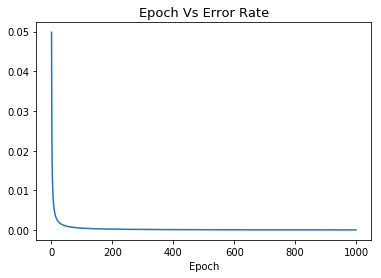

In [520]:
num_inputs = len(X_train_New[0])
hidden_layer_neurons = 13
np.random.seed(4)
b1 = 2*np.random.random(num_inputs) -1
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1


num_outputs = 7
b2 = 2*np.random.random(num_inputs) -1
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1


error = []
b1=0
b2=0
learning_rate = 0.2 # slowly update the network
for epoch in range(1000):
    l1 = 1/(1 + np.exp(-(np.dot(X_train1_New, w1) + b1))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2) +b2 )))
    er = (abs(y_train1 - l2)).mean()
    l2_delta = (y_train - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X_train_New.T.dot(l1_delta) * learning_rate
    error.append(er/(epoch*0.1))
    print('Error:', er)
    

sp = pd.Series(error)
sp.plot()
plt.title("Epoch Vs Error Rate",fontsize=13)
plt.xlabel("Epoch")

# Draw the Neural Network plot

(0.0, 1.0, 0.0, 1.0)

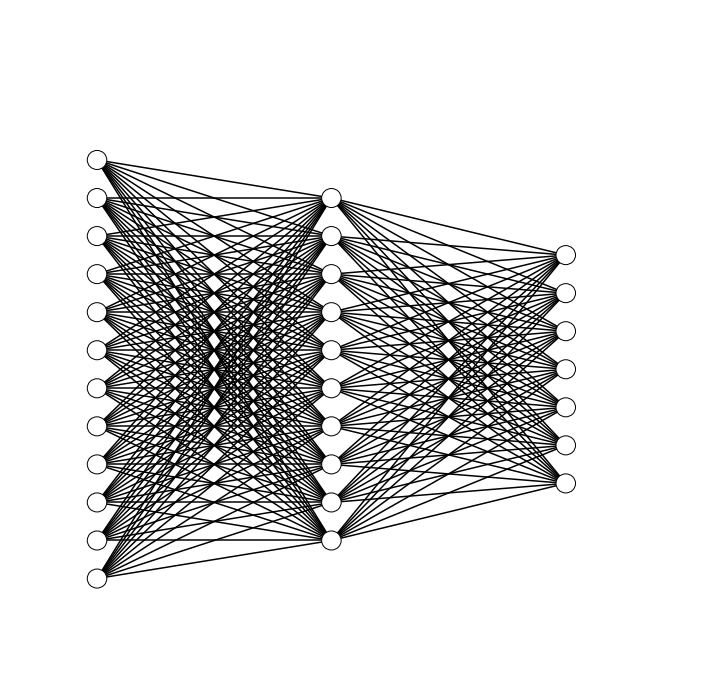

In [521]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .8, .1, .8, [12, 10, 7])

# KNN

In [51]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
para_knn = {'n_neighbors': range(1,100)}
gs_cv_knn1 = GridSearchCV(KNeighborsClassifier(), para_knn, cv=5, return_train_score=True) 
gs_cv_knn2 = GridSearchCV(KNeighborsClassifier(), para_knn, cv=5, return_train_score=True) 
gs_cv_knn3 = GridSearchCV(KNeighborsClassifier(), para_knn, cv=5, return_train_score=True)

gs_cv_knn1.fit(X_train1_New, y_train1)
gs_cv_knn2.fit(X_train2_New, y_train2)
gs_cv_knn3.fit(X_train3_New, y_train3)
print("Best parameters: {}".format(gs_cv_knn1.best_params_))
print("Best parameters: {}".format(gs_cv_knn2.best_params_))
print("Best parameters: {}".format(gs_cv_knn3.best_params_))

print("Best cross-validation score for alcohol: {:.3f}".format(gs_cv_knn1.best_score_))
print("Best cross-validation score for caffeine: {:.3f}".format(gs_cv_knn2.best_score_))
print("Best cross-validation score for cannabis: {:.3f}".format(gs_cv_knn3.best_score_))

Best parameters: {'n_neighbors': 3}
Best parameters: {'n_neighbors': 5}
Best parameters: {'n_neighbors': 9}
Best cross-validation score for alcohol: 0.983
Best cross-validation score for caffeine: 0.985
Best cross-validation score for cannabis: 0.802


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

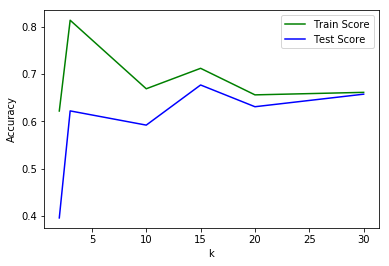

In [411]:
%matplotlib inline
train_score_array = []
test_score_array = []
krange = [2, 3, 10, 15, 20,30]
for k in krange:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train1_New, y_train1)
    train_score_array.append(knn.score(X_train1_New, y_train1))
    test_score_array.append(knn.score(X_test1_New, y_test1))
    
x_axis = [2, 3, 10, 15, 20,30]
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()   

# Linear/Logistic Reg/SVC ( unavailable in my case, because I transformed my target variable into a 7 dimensions dummy variable which made it not binary anymore )

#### feature importance plot

|Model name| Hyper-parameters|Model Score|
|---|---|---|
|KNeighborsClassifier| k = 3 | 0.983 |
|Neural Network | loss: 0.0218 | 0.9946 |
|Grid Search Decision Tree| criterion:entropy   max_depth:1   max_leaf_nodes:4  min_samples_split:2| 0.979 |
|Random Forest|max_depth=1  max_features=auto   max_leaf_nodes=4   min_samples_leaf=1 min_samples_split=2   n_estimators=500   n_jobs=-1| 0.98056 |


### Based on the information above, Neural Network is the best model

# Prediction

# When we encounter a new person, we can ask him for all the information about his age, country, enthnicity etc, and embed our model on this information to get the likelihood that this person's drug use history. 

In [58]:
person = {'Age':1, 
          'Gender':1, 
          'Education':5, 
          'Country_Republic of Ireland':0, 
          'Country_UK':0,
          'Country_USA':0,
          'Country_Canada':0,
          'Country_Other':1,
          'Country_New Zealand':0,
          'Country_Australia':0,
          'Ethnicity_Asian':1,
          'Ethnicity_Black':0,
          'Ethnicity_Black/Asian':0,
          'Ethnicity_Other':0,
          'Ethnicity_White':0,
          'Ethnicity_White/Asian':0,
          'Ethnicity_White/Black':0,
          'Nscore':0.31287,
          'Escore':0.31287, 
          'Oscore':-0.57545, 
          'Ascore':-0.58331, 
          'Cscore':-0.91699, 
          'Impulsive':-0.00665, 
          'SS':-0.21712}


In [59]:
Person = pd.DataFrame(person,index=['Lisa'],columns=['Age',
                                                    'Gender',
                                                    'Education',
                                                    'Nscore',
                                                    'Escore',
                                                    'Oscore',
                                                    'Ascore',
                                                    'Cscore',
                                                   'Impulsive',
                                                    'SS',
                                                    'Country_Republic of Ireland',
                                                    'Country_New Zealand',
                                                    'Country_Australia',
                                                    'Country_Other',
                                                    'Country_Canada',
                                                    'Country_UK',
                                                    'Country_USA',
                                                    'Ethnicity_Asian',
                                                    'Ethnicity_Black',
                                                    'Ethnicity_Black/Asian',
                                                    'Ethnicity_Other',
                                                    'Ethnicity_White',
                                                    'Ethnicity_White/Asian',
                                                    'Ethnicity_White/Black'])
Person

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,...,Country_Canada,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Black/Asian,Ethnicity_Other,Ethnicity_White,Ethnicity_White/Asian,Ethnicity_White/Black
Lisa,1,1,5,0.31287,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,0,0,0,1,0,0,0,0,0,0


In [75]:
X_lisa = Person.values
output = classifier.predict(X_lisa, batch_size=None, verbose=0, steps=None)
index = np.argmax(output, axis=None, out=None)
index


0